In [12]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib import colors

In [99]:
np.random.seed(123)

N = 10  # number of nodes 128x128 pixels
k = 4  # avg. number of connections per node
P = 10  # random patterns to learn

# C := Network structure (connectivity topology)
C = np.zeros((N,k), dtype='int')
for i in range(N):
    for ki in range(k//2):
        C[i, ki] = i + (ki+1)
        C[i, ki+k//2] = i - (ki + 1)
C[np.where(C < 0)] = C[np.where(C < 0)] + N
C[np.where(C >= N)] = C[np.where(C >= N)] - N

C, np.shape(C)

(array([[1, 2, 9, 8],
        [2, 3, 0, 9],
        [3, 4, 1, 0],
        [4, 5, 2, 1],
        [5, 6, 3, 2],
        [6, 7, 4, 3],
        [7, 8, 5, 4],
        [8, 9, 6, 5],
        [9, 0, 7, 6],
        [0, 1, 8, 7]]),
 (10, 4))

In [92]:
i = 0
ci = [1, 2, 9, 8]
cj = 1
all_nodes - (set([i] + ci) - set([cj]))

{1, 3, 4, 5, 6, 7}

In [103]:
#np.random.seed(123)

N = 10  # number of nodes 128x128 pixels
k = 4  # avg. number of connections per node
P = 10  # random patterns to learn

# C := Network structure (connectivity topology)
C = np.zeros((N,k), dtype='int')
for i in range(N):
    for ki in range(k//2):
        C[i, ki] = i + (ki+1)
        C[i, ki+k//2] = i - (ki + 1)
C[np.where(C < 0)] = C[np.where(C < 0)] + N
C[np.where(C >= N)] = C[np.where(C >= N)] - N

C, np.shape(C)

omega = 0.0
all_nodes = set(range(N))
#print(all_nodes)
for i,ci in enumerate(C):
    for j,cj in enumerate(ci):
        #print(i, ci, cj, j)
        if np.random.random() < omega:
            available_nodes = list(all_nodes - (set([i] + ci) - set([cj])))[1:]
            C[i, j] = np.random.choice(available_nodes)
C

array([[1, 2, 9, 8],
       [2, 3, 0, 9],
       [3, 4, 1, 0],
       [4, 5, 6, 1],
       [5, 6, 1, 2],
       [6, 7, 4, 3],
       [3, 8, 5, 4],
       [8, 9, 6, 5],
       [9, 0, 7, 6],
       [0, 2, 8, 8]])

In [2]:
from scipy.stats import bernoulli
# Random network
N = 128*128  # number of nodes 128x128 pixels
k = 100  # avg. number of connections per node
P = 10  # random patterns to learn
p = k/N
C = []
for i in range(N):
    C += np.where(np.insert(bernoulli.rvs(p, size=(N-1)), i, 0))
C = np.array(C)
#C

(0.09466552734375, (9, 16384))

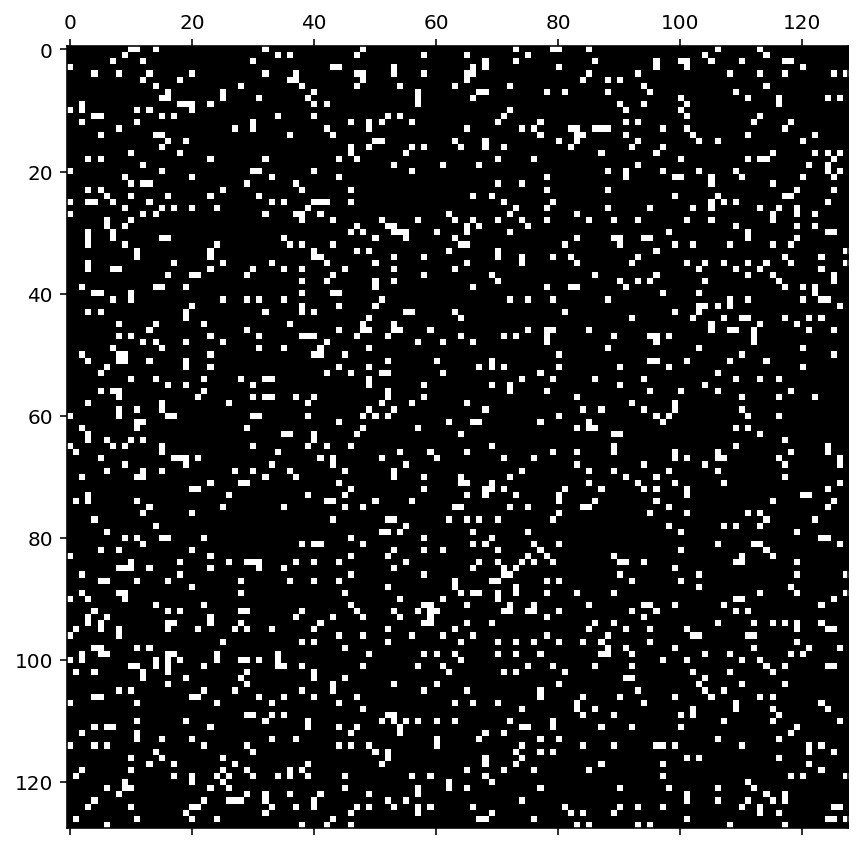

In [30]:
# Random patterns
from matplotlib import colors
cmap = colors.ListedColormap(['black', "white"])
X = binom.rvs(n=1, p=0.1, size=(P-1, N))
X, np.shape(X), np.mean(X)
plt.matshow(X[-1].reshape(128,128), cmap=cmap)
np.mean(X[-1]), np.shape(X)

((10, 16384), 0.103515625)

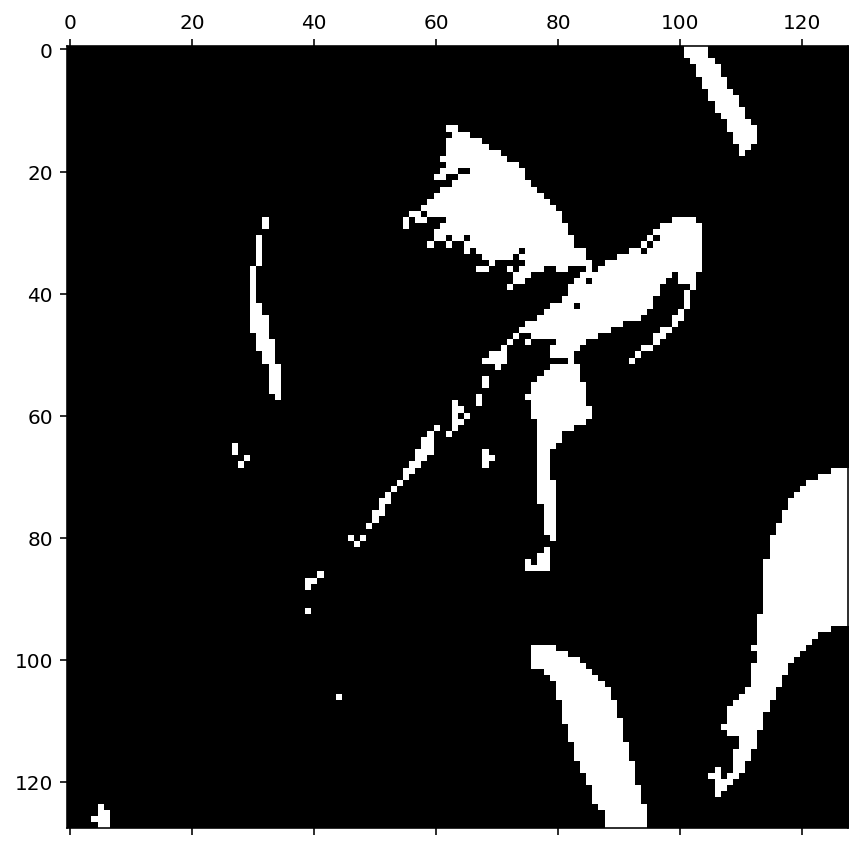

In [31]:
img = Image.open('./ann/lenna.png')
img = img.resize((128,128), Image.ANTIALIAS)
imggs = img.convert('L')
th_value = 185
imgbw = np.asarray(imggs)
imgbw = (imgbw > th_value)*1
imgbw = imgbw
plt.matshow(imgbw, cmap=cmap)
#print('activity:', 1 - np.mean(imgbw))
lenna = imgbw.reshape(1, 128*128)
X = np.concatenate((X, lenna))
np.shape(X), np.mean(imgbw)

In [32]:
# pattern normalization
nX = np.array([(x - np.mean(x))/np.sqrt(np.mean(x)*(1-np.mean(x))) for x in X])
np.mean(nX), np.mean(1)
nX, np.shape(nX)

(array([[-0.33610693, -0.33610693, -0.33610693, ..., -0.33610693,
          2.97524361, -0.33610693],
        [-0.32600543, -0.32600543, -0.32600543, ...,  3.06743356,
         -0.32600543, -0.32600543],
        [-0.34192575, -0.34192575, -0.34192575, ..., -0.34192575,
         -0.34192575, -0.34192575],
        ...,
        [-0.3348684 , -0.3348684 , -0.3348684 , ..., -0.3348684 ,
         -0.3348684 , -0.3348684 ],
        [-0.3233638 , -0.3233638 , -0.3233638 , ..., -0.3233638 ,
         -0.3233638 , -0.3233638 ],
        [-0.33980643, -0.33980643, -0.33980643, ..., -0.33980643,
         -0.33980643, -0.33980643]]),
 (10, 16384))

In [33]:
# init weights in 0
W = np.array([np.zeros(len(ci)) for ci in C])

#for each pattern x in X
for x in nX:
    # for each node i
    for i in range(N):
        W[i] = W[i] + x[C[i]]*x[i]
#W

In [18]:
def normalize_vector(vector):
    av = np.mean(vector)
    return (vector - av)/np.sqrt(av*(1-av))

def act_threshold(neighbors, th):
    if np.mean(neighbors) > 0.5:
        th = -th
    return th

In [21]:
act_threshold([1,1,1,0], 1.33)

-1.33

In [34]:
a = 0.1
A = a*(1-a)
threshold = (1-2*a)/(2*np.sqrt(A))
threshold

1.3333333333333333

/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


(0.0, 1.0)

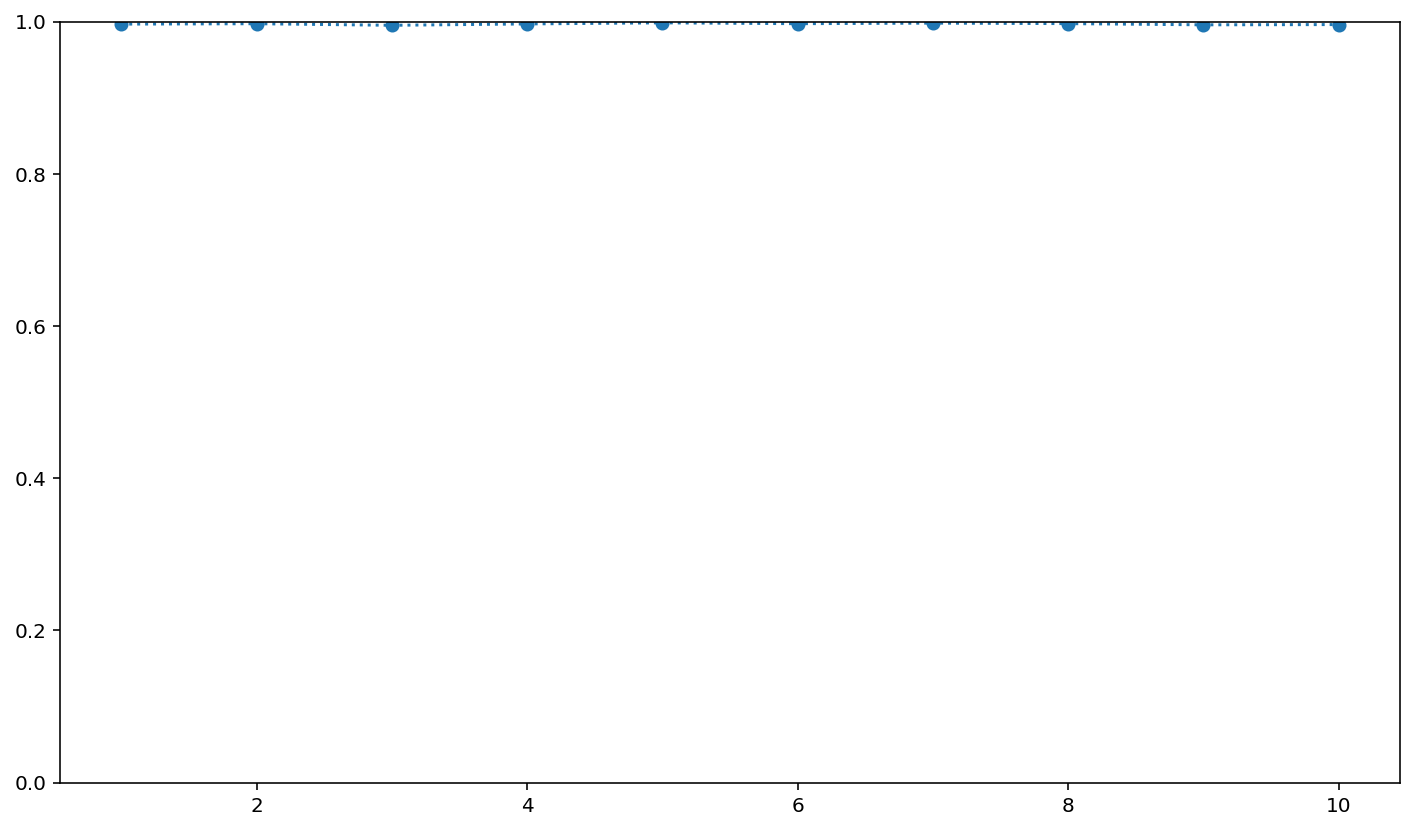

In [35]:
# Measure the quality of retrieval 
M = []  # M is 1, perfect retrieval, M is 0 no retrieval

#for each pattern x in X
# X: original patterns 0/1
# nX: normalized patterns
for x in X:
    # xt: network state
    xt = np.copy(x)  # pattern x in time 0

    # initial overlap in time 0, x is equal to xt, so m=1
    m = [np.sum(normalize_vector(x)*normalize_vector(xt))/N]

    # update network for 100 steps
    for ti in range(100):
        xt = np.array([(np.mean(normalize_vector(xt[C[nxi]])*W[nxi])-act_threshold(xt[C[nxi]], threshold) >= 0) 
                       for nxi in range(N)])
        #xt = xt.astype('int')
        m += [np.sum(normalize_vector(x)*normalize_vector(xt))/N]  # calculate overlap
        if m[-1] == m[-2]:
            break
    M += [m[-1]]
    
plt.plot(np.array(range(1,len(X)+1)), M, ':o')
plt.ylim((0,1))

(<matplotlib.image.AxesImage at 0x7f64bad83978>, 0.9960560396743132)

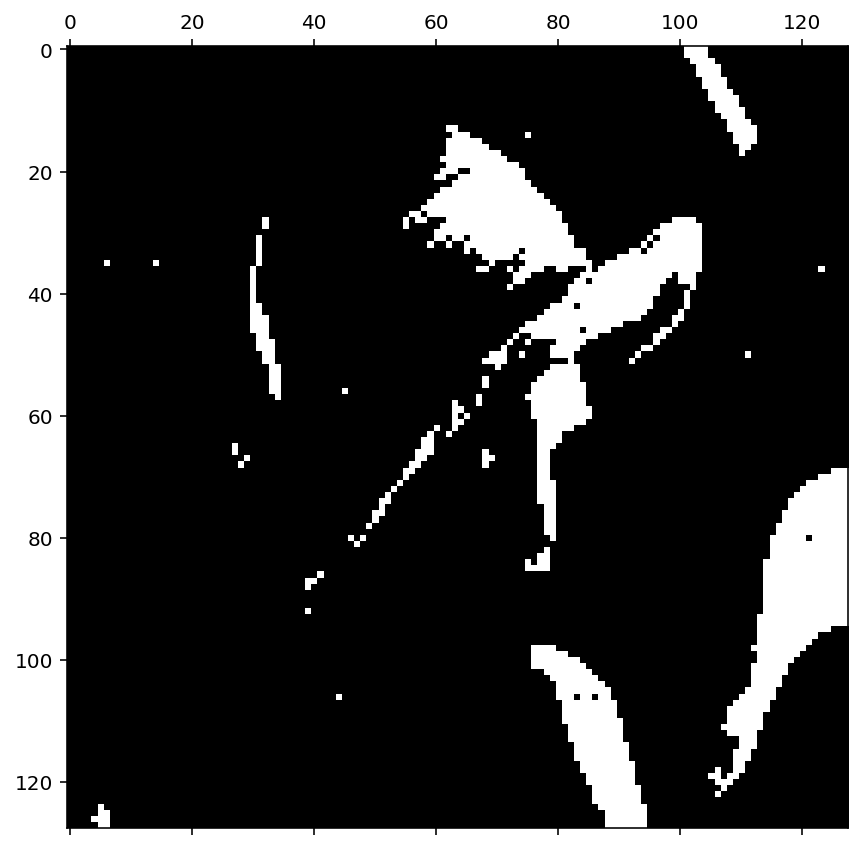

In [36]:
plt.matshow(xt.reshape(128,128), cmap=cmap), m[-1]

0.1029052734375

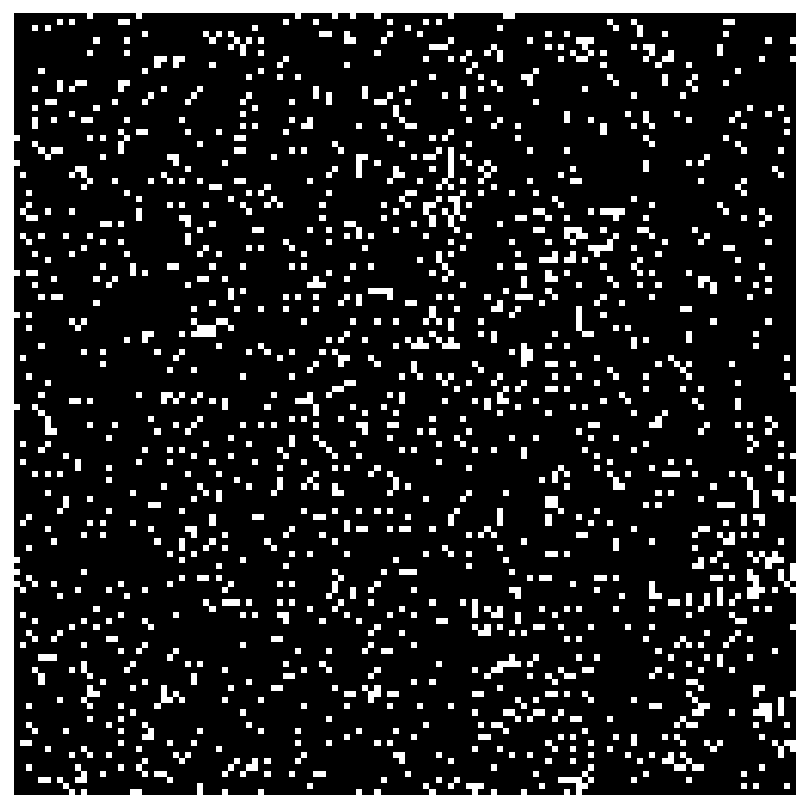

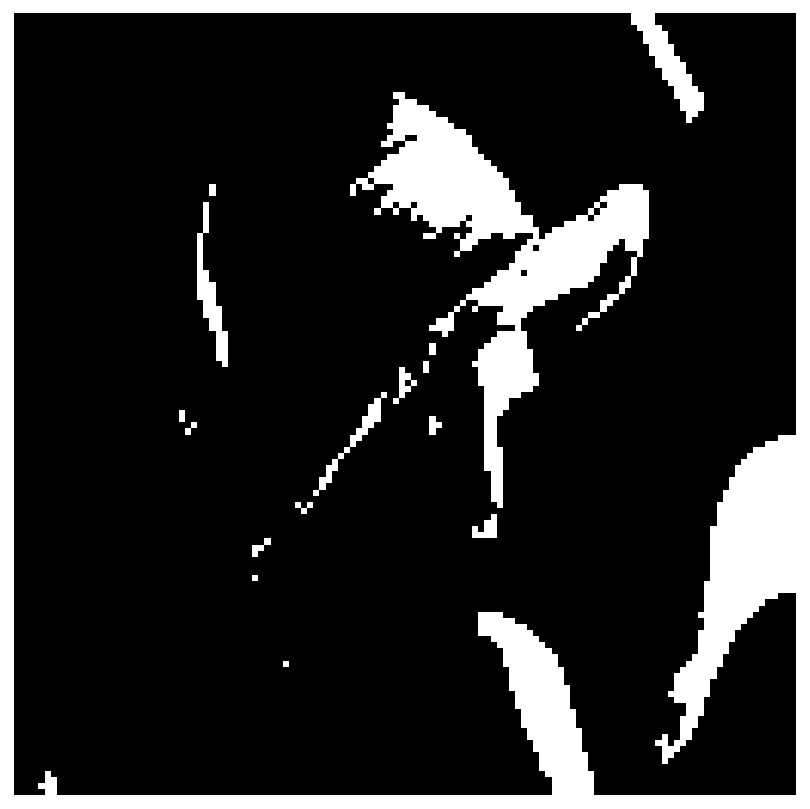

In [57]:
noise_level = 0.9

noisy_lenna = lenna.copy()

for i in range(np.shape(noisy_lenna)[1]):
    if np.random.random() < noise_level:
        noisy_lenna[0, i] = bernoulli.rvs(0.1)

plt.matshow(noisy_lenna.reshape((128,128)), cmap=cmap)
a = plt.axis('off')

x = X[-1] 
plt.matshow(x.reshape((128,128)), cmap=cmap)
a = plt.axis('off')

noisy_lenna.reshape((128,128))
np.mean(noisy_lenna)

/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


0.00372314453125


0.0242919921875


0.0418701171875


0.10357666015625


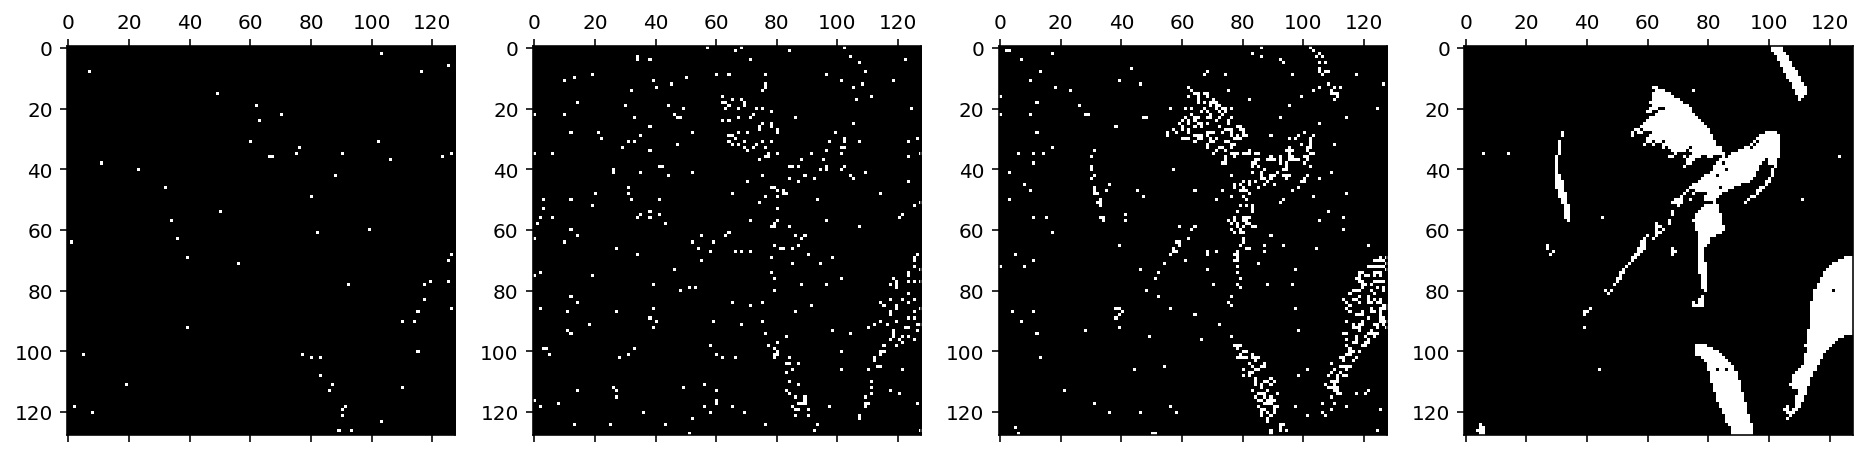

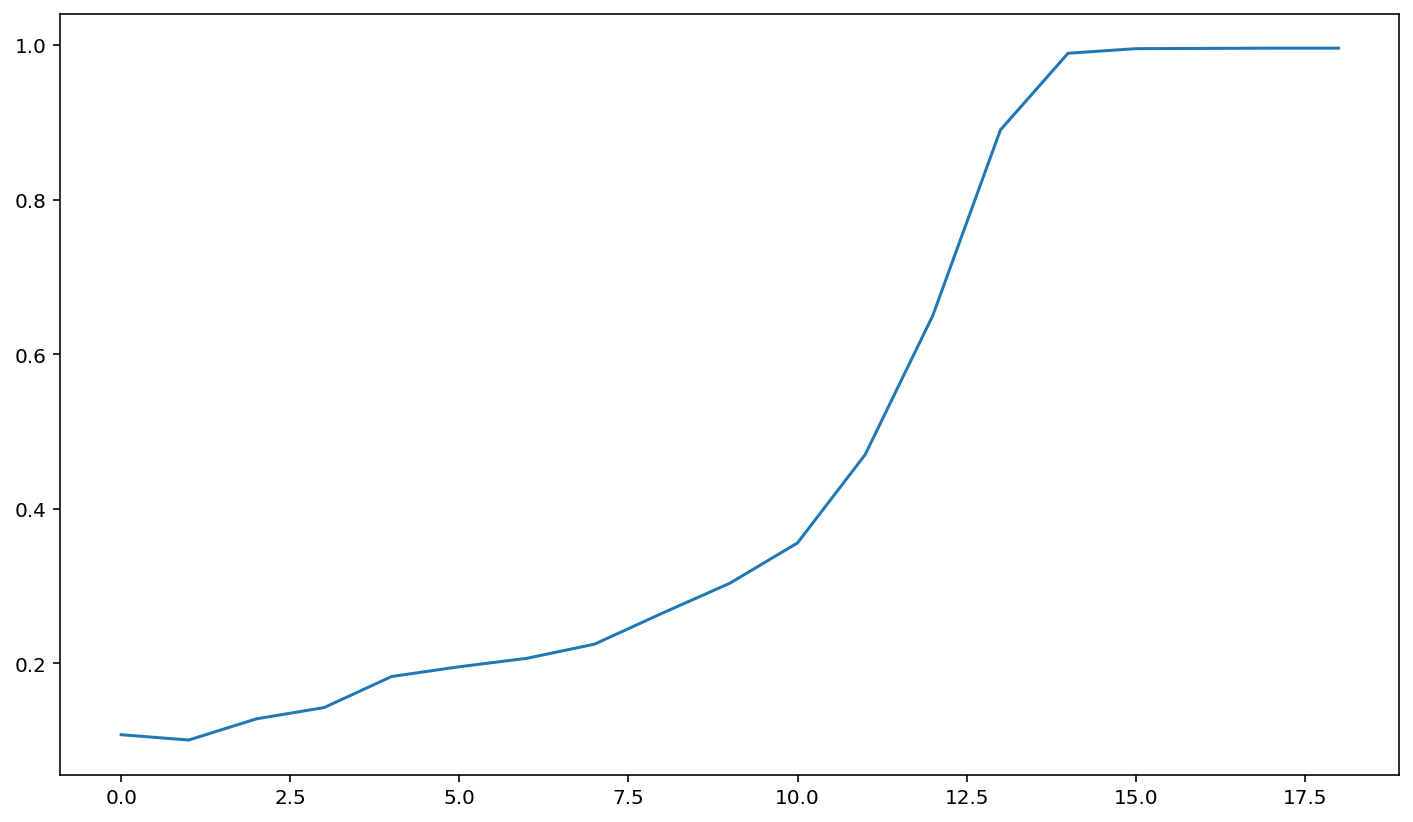

0.9960560396743132

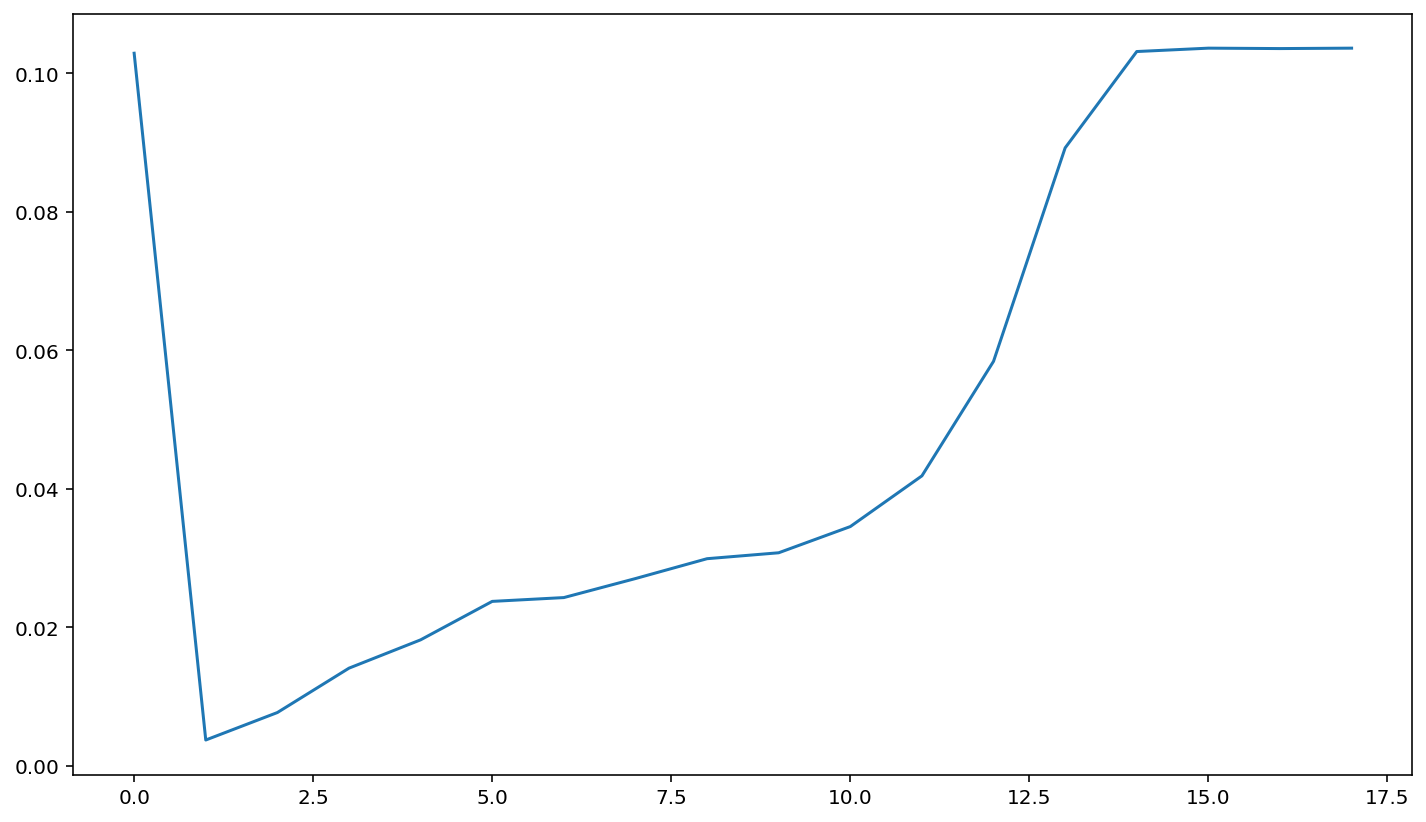

In [72]:
x = X[-1]  # Learned Lenna is in X, last pattern

xt = np.copy(noisy_lenna.flatten())  # init network in noisy lenna
        
m = [np.sum(normalize_vector(x)*normalize_vector(xt))/N]  # initial overlap

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(16,32))
ploti = 0

a_net = []

for ti in range(100):
    # network update for t=100
    a_net += [np.mean(xt)]
    xt = np.array([(np.mean(normalize_vector(xt[C[nxi]])*W[nxi])-act_threshold(xt[C[nxi]], threshold) >= 0) 
                       for nxi in range(N)])
    m += [np.sum(normalize_vector(x)*normalize_vector(xt))/N]  # test overlap x and xt (net state)
    if not (ti % 5):
        print(np.mean(xt))
        ax[ploti].matshow(xt.reshape((128,128)), cmap=cmap)
        ploti += 1
    if m[-1] == m[-2]:
        break
plt.show()
plt.plot(m)
plt.show()
plt.plot(a_net)
m[-1]

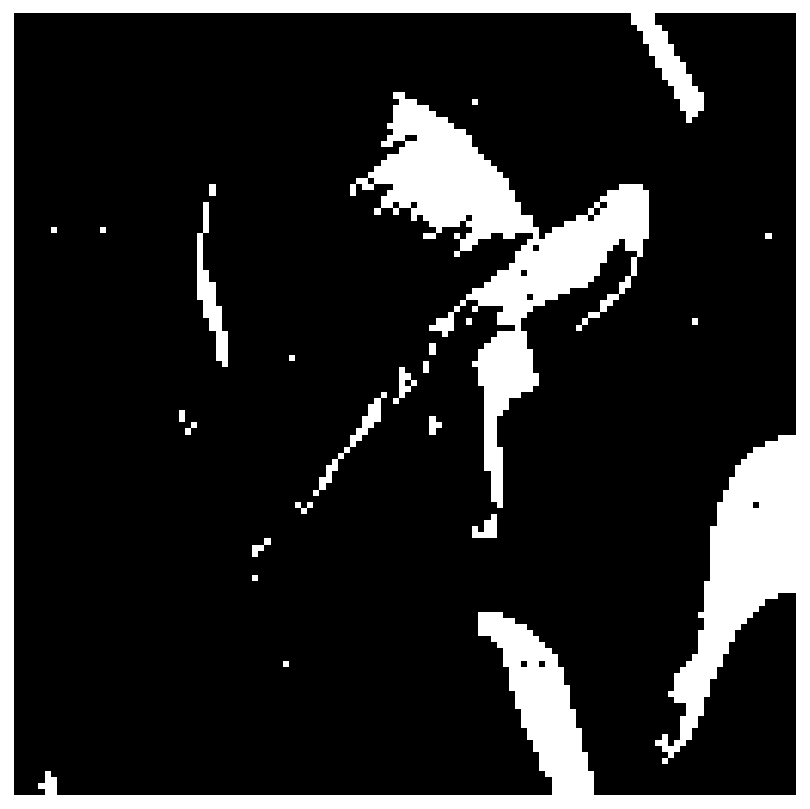

In [44]:
plt.matshow(xt.reshape((128,128)), cmap=cmap)
a = plt.axis('off')

In [70]:
np.mean(noisy_lenna)

0.1029052734375